In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import metrics, Model, layers
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from pathlib import Path
from PIL import Image

In [ ]:
from google.colab import drive
from zipfile import ZipFile

drive.mount('/content/drive')
file_name='/content/drive/My Drive/Colab Notebooks/Malaria Detector/Dataset.zip'
with ZipFile(file_name,'r') as zip:
          zip.extractall()

Mounted at /content/drive


In [ ]:
data_dir = '/content/cell_images'
parasitized_data = list(Path(data_dir+'/Parasitized/').rglob('*.png'))
uninfected_data = list(Path(data_dir+'/Uninfected/').rglob('*.png'))

data = []
labels = []
IMG_SIZE = 50

In [ ]:
for img_path in parasitized_data:
    try:
        img = Image.open(img_path)
        img = img.resize((IMG_SIZE, IMG_SIZE))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img_path in uninfected_data:
    try:
        img = Image.open(img_path)
        img = img.resize((IMG_SIZE, IMG_SIZE))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(0)
    except:
        None

image_data = np.array(data)
labels = np.array(labels)

print("image_data shape:", image_data.shape)
print("labels shape:", labels.shape)

image_data shape: (27558, 50, 50, 3)
labels shape: (27558,)


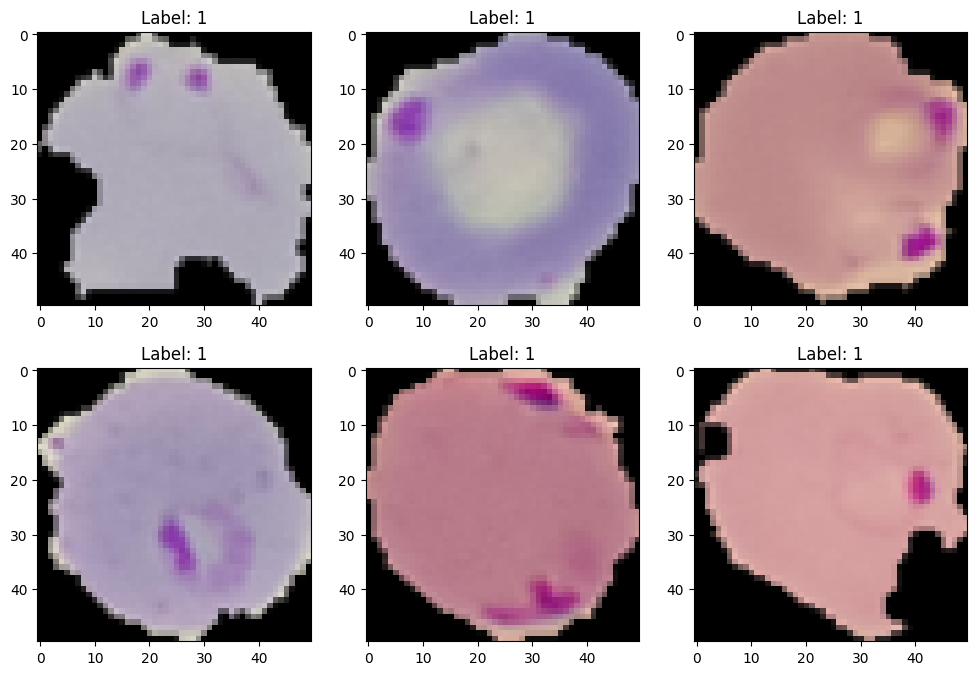

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(data[i])
    ax.set_title('Label: {}'.format(labels[i]))
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.2, random_state=0)

X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test = keras.utils.to_categorical(y_test, num_classes=2)

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
552/552 [==============================] - 18s 9ms/step - loss: 0.5665 - accuracy: 0.7697 - val_loss: 1.1521 - val_accuracy: 0.6755
Epoch 2/30
552/552 [==============================] - 5s 8ms/step - loss: 0.2189 - accuracy: 0.9170 - val_loss: 0.2089 - val_accuracy: 0.9304
Epoch 3/30
552/552 [==============================] - 5s 8ms/step - loss: 0.1800 - accuracy: 0.9345 - val_loss: 0.1487 - val_accuracy: 0.9512
Epoch 4/30
552/552 [==============================] - 5s 9ms/step - loss: 0.1769 - accuracy: 0.9388 - val_loss: 0.2258 - val_accuracy: 0.9218
Epoch 5/30
552/552 [==============================] - 5s 9ms/step - loss: 0.1671 - accuracy: 0.9434 - val_loss: 0.1550 - val_accuracy: 0.9490
Epoch 6/30
552/552 [==============================] - 5s 8ms/step - loss: 0.1607 - accuracy: 0.9439 - val_loss: 0.1421 - val_accuracy: 0.9540
Epoch 7/30
552/552 [==============================] - 4s 8ms/step - loss: 0.1508 - accuracy: 0.9478 - val_loss: 0.1422 - val_accuracy: 0.9560
Epoch

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

173/173 [==============================] - 1s 4ms/step - loss: 0.1407 - accuracy: 0.9554
Test loss: 0.14066001772880554
Test accuracy: 0.9553701281547546


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0

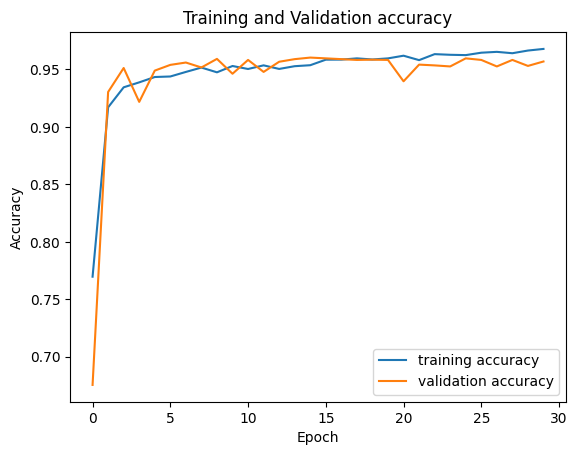

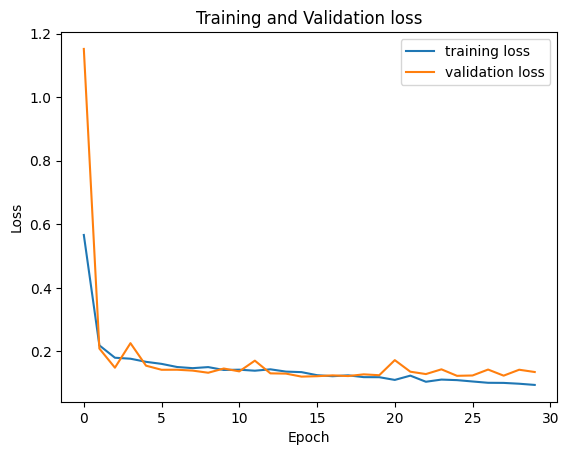

In [ ]:
model.save('model-1.h5')

loaded_model = tf.keras.models.load_model('model-1.h5')
loaded_model.summary()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

173/173 [==============================] - 1s 4ms/step - loss: 0.1501 - accuracy: 0.9585
Test loss: 0.15005774796009064
Test accuracy: 0.9584543108940125
173/173 [==============================] - 1s 3ms/step


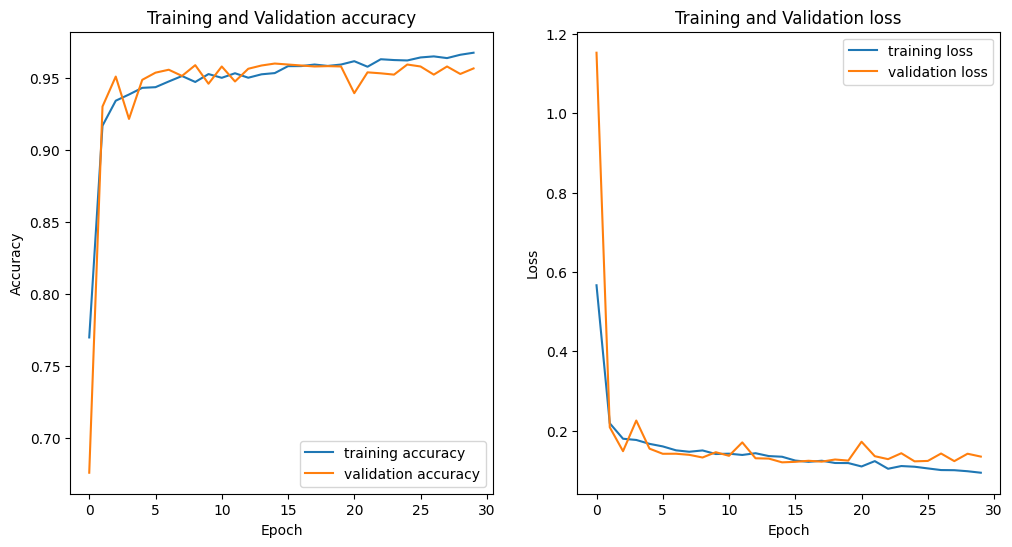

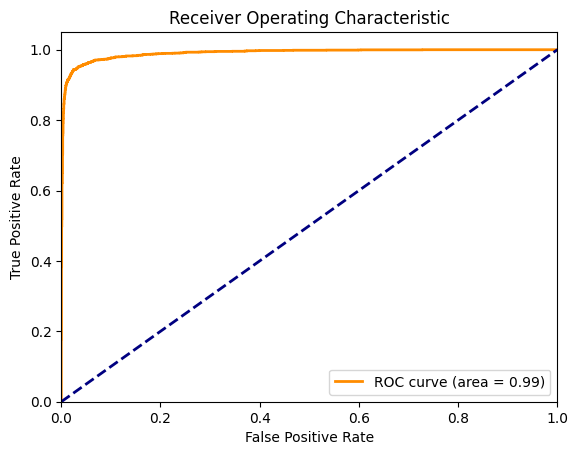

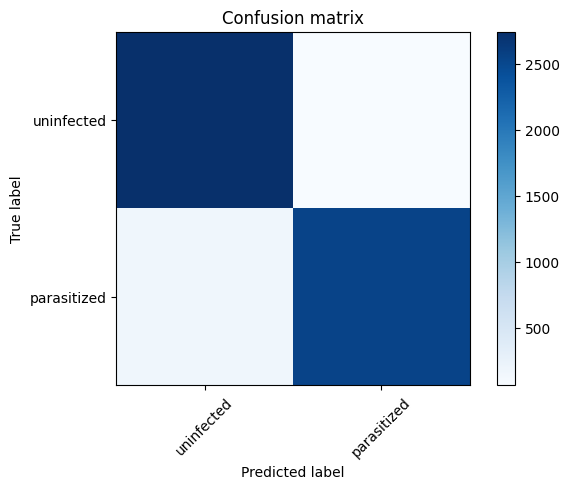

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)
cm = confusion_matrix(y_test[:, 1], y_pred)

fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(history.history['accuracy'], label='training accuracy')
ax[0].plot(history.history['val_accuracy'], label='validation accuracy')
ax[0].set_title('Training and Validation accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='training loss')
ax[1].plot(history.history['val_loss'], label='validation loss')
ax[1].set_title('Training and Validation loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend()

plt.show()

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(['uninfected', 'parasitized']))
plt.xticks(tick_marks, ['uninfected', 'parasitized'], rotation=45)
plt.yticks(tick_marks, ['uninfected', 'parasitized'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()